# Pacing Strategies and Performance Analysis

**3. Pace Analysis and Consistency:**
   - **Subheading: "Pace Consistency Over Time"**
     - Visualization: Line chart showing individual or grouped participant pace at each interval checkpoint.
   - **Subheading: "Pace Deviation Analysis"**
     - Visualization: Box plot or violin plot showing the distribution of pace deviation from the average pace.

**4. Gender and Category Pacing Differences:**
   - **Subheading: "Gender-Based Pacing Analysis"**
     - Visualization: Line chart comparing pace across different intervals for male and female participants.
   - **Subheading: "Category-Based Pacing Analysis"**
     - Visualization: Line chart comparing pace across different intervals for different age groups or categories.

**5. Pacing Strategies and Performance Correlation:**
   - **Subheading: "Pacing Strategy Analysis"**
     - Visualization: Scatter plot showing the relationship between pace consistency and overall performance.
   - **Subheading: "Pacing Variability Impact"**
     - Visualization: Heatmap or correlation plot showing the impact of pacing variability on final performance metrics.

**6. Checkpoint Pace Comparison:**
   - **Subheading: "Checkpoint Pace Analysis"**
     - Visualization: Line chart or area chart showing the pace at each checkpoint for different groups.

**7. Time Analysis by Race Segment:**
   - **Subheading: "Segment-wise Pace Analysis"**
     - Visualization: Line chart or area chart showing the pace for each segment of the race course.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plot_colors = {'2O-Bl':'#1f2649',
          '2O-Or':'#e87f33',
              '2O-Gr': '#71b94f'}


In [3]:
df = pd.read_csv('data/raw/56km_results.csv')

In [4]:
df.head()

,Page No,Pos,Name,Time,Medal,Club,Gender,Category,Start,5km,14km,28km,42.2km,50km
0,1,1.0,ONALENNA KHONKHOBE,03:09:30,Gold,NEDBANK DEVELOPMENT CLUB CENTRAL NORTH WEST,Male,Senior,05:15:04,00:17:38,00:48:12,01:36:39,02:25:21,02:52:00
1,1,2.0,LLOYD BOSMAN,03:09:58,Gold,NEDBANK RUNNING CLUB SOUTH WESTERN DISTRICTS,Male,Senior,05:15:05,00:17:39,00:48:14,01:36:41,02:25:21,02:51:48
2,1,3.0,GIVEMORE MUDZINGANYAMA,03:11:13,Gold,NaN,Male,Senior,05:15:04,00:17:40,00:48:16,01:36:47,02:25:22,02:52:09
3,1,4.0,LEBELLO MOPENYANE,03:11:21,Gold,NaN,Male,Senior,05:15:05,00:17:53,00:48:13,01:36:40,02:25:23,02:52:04
4,1,5.0,MPHATSO NADOLO,03:11:35,Gold,NaN,Male,Senior,05:15:02,00:17:41,00:48:16,01:36:44,02:25:19,02:52:24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229 entries, 0 to 12228
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Page No   12229 non-null  int64  
 1   Pos       10177 non-null  float64
 2   Name      12229 non-null  object 
 3   Time      12229 non-null  object 
 4   Medal     10455 non-null  object 
 5   Club      11034 non-null  object 
 6   Gender    12229 non-null  object 
 7   Category  12229 non-null  object 
 8   Start     10709 non-null  object 
 9   5km       10804 non-null  object 
 10  14km      10773 non-null  object 
 11  28km      10760 non-null  object 
 12  42.2km    10473 non-null  object 
 13  50km      10488 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.3+ MB


**1. Pace Distribution and Trends:**
   - **Subheading: "Overall Pace Distribution"**
     - Visualization: Histogram or box plot showing the distribution of finish times across all participants.

In [6]:
df['Time'].value_counts()

Time
Not started            1377
DNF                     384
Unofficial Finisher     291
06:51:39                 10
06:26:23                  8
                       ... 
05:06:18                  1
06:04:07                  1
06:04:08                  1
06:04:10                  1
03:09:30                  1
Name: count, Length: 6058, dtype: int64

In [8]:
# Remove "Not started", "DNF", and "Unofficial Finisher" entries from the time column
pace_dist_df = df[~df['Time'].isin(['Not started', 'DNF', 'Unofficial Finisher'])].copy()

In [9]:
pace_dist_df['Time'].value_counts()

Time
06:51:39    10
06:26:23     8
05:59:08     7
05:35:39     7
06:28:41     7
            ..
05:29:57     1
05:29:56     1
05:29:54     1
05:29:53     1
07:12:27     1
Name: count, Length: 6055, dtype: int64

In [10]:
pace_dist_df['Time'] = pd.to_datetime(pace_dist_df['Time'], format='%H:%M:%S')

In [11]:
average_time = pace_dist_df['Time'].median()

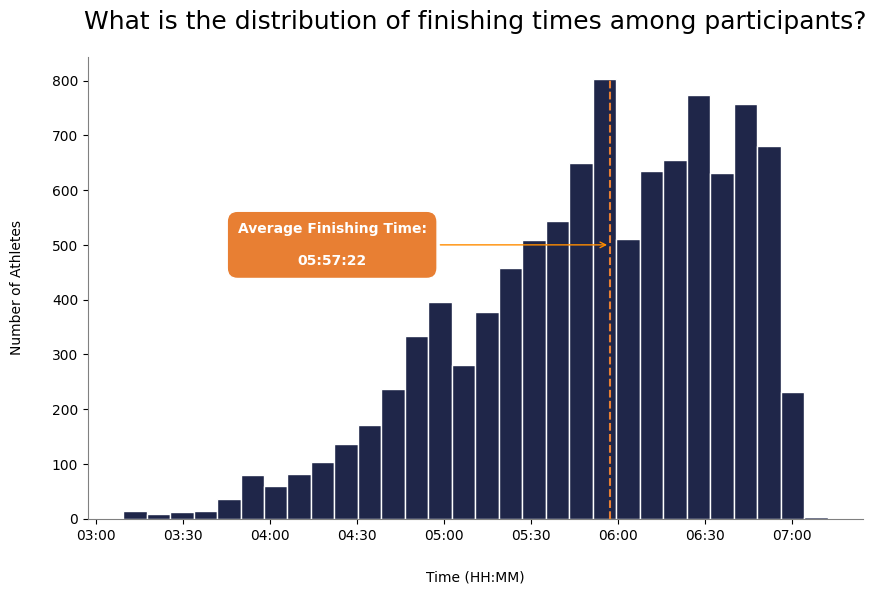

In [13]:
from matplotlib.dates import DateFormatter

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the finishing times on a histogram
ax.hist(pace_dist_df['Time'], bins=30, color='#1f2649', edgecolor='white', zorder=1)
ax.set_xlabel('Time (HH:MM)', labelpad=20)
ax.set_ylabel('Number of Athletes', labelpad=20)
ax.set_title('What is the distribution of finishing times among participants?', pad=20, fontsize=18)


# # Plot average time line
average_time_line = ax.axvline(average_time, color='#e87f33', linestyle='dashed', linewidth=1.5, label=f'Average Time: {average_time.strftime("%H:%M:%S")}', ymax=0.95)

# Create a 90-degree dashed line from the average time line
ax.plot([average_time, average_time], [0, 0.95], color='darkorange', linestyle='dashed', linewidth=1)

# Annotate the legend with a box
legend_box = ax.annotate(f'Average Finishing Time:\n\n{average_time.strftime("%H:%M:%S")}', color='white', xy=(average_time, 500), xycoords='data', xytext=(-200, 0), textcoords='offset points',
                         bbox=dict(boxstyle='round,pad=0.75', fc='#e87f33', ec='white', alpha=1),
                         arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0', color='darkorange'),
                         ha='center', va='center', weight='600')

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['right'].set_visible(False)

# Format x-axis labels to display only time
date_format = DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)


**2. Pace Comparison Across Categories:**
   - **Subheading: "Pace Comparison by Gender and Age Group"**
     - Visualization: Grouped bar chart comparing average pace across different gender and age groups.
   - **Subheading: "Club-wise Pace Comparison"**
     - Visualization: Grouped bar chart comparing pace across different clubs.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229 entries, 0 to 12228
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Page No   12229 non-null  int64  
 1   Pos       10177 non-null  float64
 2   Name      12229 non-null  object 
 3   Time      12229 non-null  object 
 4   Medal     10455 non-null  object 
 5   Club      11034 non-null  object 
 6   Gender    12229 non-null  object 
 7   Category  12229 non-null  object 
 8   Start     10709 non-null  object 
 9   5km       10804 non-null  object 
 10  14km      10773 non-null  object 
 11  28km      10760 non-null  object 
 12  42.2km    10473 non-null  object 
 13  50km      10488 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.3+ MB


In [18]:
import datetime

pace_comp_df = df[['Time', 'Gender', 'Category']].copy()
pace_comp_df = pace_comp_df[~pace_comp_df['Time'].isin(['Not started', 'DNF', 'Unofficial Finisher'])]

pace_comp_df['Time'] = pd.to_datetime(pace_comp_df['Time'], format='%H:%M:%S')

# Given seconds value
seconds = (pace_comp_df['Time'] - datetime.datetime(1900, 1, 1)).dt.total_seconds()

# Total distance covered in kilometers
distance_km = 56  # Assuming standard marathon distance

# Convert seconds to pace in minutes per kilometer
pace_comp_df['Pace_mins_per_km'] = seconds / 60 / distance_km

(-0.65, 5.1)

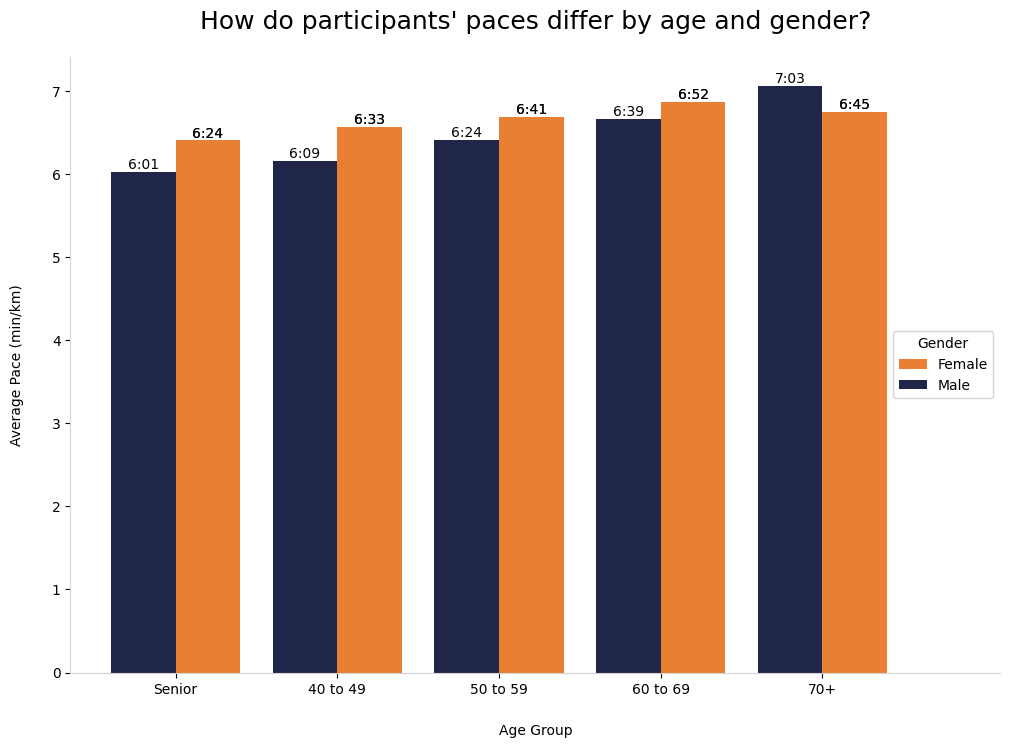

In [19]:
import matplotlib.pyplot as plt

# Define colors for male and female bars
colors = {'Male': plot_colors['2O-Bl'], 'Female': plot_colors['2O-Or']}

# Pivot the DataFrame, ensuring all age group categories are included
pivot_df = pace_comp_df.pivot_table(index='Category', columns='Gender', values='Pace_mins_per_km', fill_value=0)

age_group_order = ['Senior', '40 to 49', '50 to 59', '60 to 69', '70+']

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))


# Plot the grouped bar chart
for i, col in enumerate(pivot_df.columns):
    bars = pivot_df[col].loc[age_group_order].plot(kind='bar', ax=ax, color=colors[col], position=i, width=0.4)
    for bar in bars.patches:
        # Get the pace value from the height of the bar
        pace_value = bar.get_height()
        
        # Convert pace to minutes and seconds
        pace_minutes = int(pace_value)  # Whole minutes
        pace_seconds = int((pace_value - pace_minutes) * 60)  # Remaining seconds

        # Format the pace as a string
        pace_string = f"{pace_minutes}:{pace_seconds:02d}"

        # Place the pace string at the top of each bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), pace_string, ha='center', va='bottom')

# Customize plot
ax.set_title("How do participants' paces differ by age and gender?", pad=20, fontsize=18)
ax.set_xlabel('Age Group', labelpad=20)
ax.set_ylabel('Average Pace (min/km)', labelpad=20)
ax.set_xticklabels(age_group_order, rotation=0)
ax.legend(title='Gender', loc='center right')

# Remove top and right spines, leave the visible ones gray
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

ax.set_xlim(-0.65, 5.1)

**3. Pace Analysis and Consistency:**
   - **Subheading: "Pace Consistency Over Time"**
     - Visualization: Line chart showing individual or grouped participant pace at each interval checkpoint.
   - **Subheading: "Pace Deviation Analysis"**
     - Visualization: Box plot or violin plot showing the distribution of pace deviation from the average pace.

In [20]:
df.columns

Index(['Page No', 'Pos', 'Name', 'Time', 'Medal', 'Club', 'Gender', 'Category',
       'Start', '5km', '14km', '28km', '42.2km', '50km'],
      dtype='object')

In [41]:
# Selecting specific columns and creating a copy
pace_con_df = df[['5km', '14km', '28km', '42.2km', '50km', 'Time', 'Gender', 'Medal', 'Category']].copy()

# Filtering out specific entries from the 'Time' column
pace_con_df = pace_con_df[~pace_con_df['Time'].isin(['Not started', 'DNF', 'Unofficial Finisher'])].copy()

# Removing rows with NaN values
pace_con_df = pace_con_df.dropna()

# Renaming the 'Time' column to 'Finish'
pace_con_df.rename(columns={'Time': 'Finish'}, inplace=True)

# Adding a new 'Start' column
pace_con_df['Start'] = '00:00:00'

# Viewing the resulting DataFrame
pace_con_df


,5km,14km,28km,42.2km,50km,Finish,Gender,Medal,Category,Start
0,00:17:38,00:48:12,01:36:39,02:25:21,02:52:00,03:09:30,Male,Gold,Senior,00:00:00
1,00:17:39,00:48:14,01:36:41,02:25:21,02:51:48,03:09:58,Male,Gold,Senior,00:00:00
2,00:17:40,00:48:16,01:36:47,02:25:22,02:52:09,03:11:13,Male,Gold,Senior,00:00:00
3,00:17:53,00:48:13,01:36:40,02:25:23,02:52:04,03:11:21,Male,Gold,Senior,00:00:00
4,00:17:41,00:48:16,01:36:44,02:25:19,02:52:24,03:11:35,Male,Gold,Senior,00:00:00
...,...,...,...,...,...,...,...,...,...,...
10171,00:33:28,01:35:45,03:14:03,04:59:48,06:17:02,06:59:56,Male,Blue,40 to 49,00:00:00
10172,00:31:32,01:26:40,02:56:16,04:52:50,06:11:48,06:59:57,Male,Blue,40 to 49,00:00:00
10173,00:31:00,01:29:51,03:09:27,05:08:54,06:18:59,06:59:58,Male,Blue,50 to 59,00:00:00
10174,00:31:41,01:32:50,03:08:10,04:56:27,06:15:38,06:59:58,Male,Blue,50 to 59,00:00:00


In [42]:
import pandas as pd

# Convert time columns to datetime objects
time_cols = ['Start', '5km', '14km', '28km', '42.2km', '50km', 'Finish']
for col in time_cols:
    pace_con_df[col] = pd.to_datetime(pace_con_df[col])

# Calculate time differences between each checkpoint
for i in range(len(time_cols) - 1):
    start_col = time_cols[i]
    end_col = time_cols[i + 1]
    diff_col_name = f'Diff_{start_col}_{end_col}'
    pace_con_df[diff_col_name] = pace_con_df[end_col] - pace_con_df[start_col]

# Display the DataFrame with calculated time differences
pace_con_df


C:\Users\Talent Match\AppData\Local\Temp\ipykernel_3908\1291030138.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pace_con_df[col] = pd.to_datetime(pace_con_df[col])
C:\Users\Talent Match\AppData\Local\Temp\ipykernel_3908\1291030138.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pace_con_df[col] = pd.to_datetime(pace_con_df[col])
C:\Users\Talent Match\AppData\Local\Temp\ipykernel_3908\1291030138.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pace_con_df[col] = pd.to_datetime(pace_con_df[col])
C:\Users\Talent Match\AppData\Local\Temp\ipykernel_3908\1291030138.

,5km,14km,28km,42.2km,50km,Finish,Gender,Medal,Category,Start,Diff_Start_5km,Diff_5km_14km,Diff_14km_28km,Diff_28km_42.2km,Diff_42.2km_50km,Diff_50km_Finish
0,2024-04-18 00:17:38,2024-04-18 00:48:12,2024-04-18 01:36:39,2024-04-18 02:25:21,2024-04-18 02:52:00,2024-04-18 03:09:30,Male,Gold,Senior,2024-04-18,0 days 00:17:38,0 days 00:30:34,0 days 00:48:27,0 days 00:48:42,0 days 00:26:39,0 days 00:17:30
1,2024-04-18 00:17:39,2024-04-18 00:48:14,2024-04-18 01:36:41,2024-04-18 02:25:21,2024-04-18 02:51:48,2024-04-18 03:09:58,Male,Gold,Senior,2024-04-18,0 days 00:17:39,0 days 00:30:35,0 days 00:48:27,0 days 00:48:40,0 days 00:26:27,0 days 00:18:10
2,2024-04-18 00:17:40,2024-04-18 00:48:16,2024-04-18 01:36:47,2024-04-18 02:25:22,2024-04-18 02:52:09,2024-04-18 03:11:13,Male,Gold,Senior,2024-04-18,0 days 00:17:40,0 days 00:30:36,0 days 00:48:31,0 days 00:48:35,0 days 00:26:47,0 days 00:19:04
3,2024-04-18 00:17:53,2024-04-18 00:48:13,2024-04-18 01:36:40,2024-04-18 02:25:23,2024-04-18 02:52:04,2024-04-18 03:11:21,Male,Gold,Senior,2024-04-18,0 days 00:17:53,0 days 00:30:20,0 days 00:48:27,0 days 00:48:43,0 days 00:26:41,0 days 00:19:17
4,2024-04-18 00:17:41,2024-04-18 00:48:16,2024-04-18 01:36:44,2024-04-18 02:25:19,2024-04-18 02:52:24,2024-04-18 03:11:35,Male,Gold,Senior,2024-04-18,0 days 00:17:41,0 days 00:30:35,0 days 00:48:28,0 days 00:48:35,0 days 00:27:05,0 days 00:19:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,2024-04-18 00:33:28,2024-04-18 01:35:45,2024-04-18 03:14:03,2024-04-18 04:59:48,2024-04-18 06:17:02,2024-04-18 06:59:56,Male,Blue,40 to 49,2024-04-18,0 days 00:33:28,0 days 01:02:17,0 days 01:38:18,0 days 01:45:45,0 days 01:17:14,0 days 00:42:54
10172,2024-04-18 00:31:32,2024-04-18 01:26:40,2024-04-18 02:56:16,2024-04-18 04:52:50,2024-04-18 06:11:48,2024-04-18 06:59:57,Male,Blue,40 to 49,2024-04-18,0 days 00:31:32,0 days 00:55:08,0 days 01:29:36,0 days 01:56:34,0 days 01:18:58,0 days 00:48:09
10173,2024-04-18 00:31:00,2024-04-18 01:29:51,2024-04-18 03:09:27,2024-04-18 05:08:54,2024-04-18 06:18:59,2024-04-18 06:59:58,Male,Blue,50 to 59,2024-04-18,0 days 00:31:00,0 days 00:58:51,0 days 01:39:36,0 days 01:59:27,0 days 01:10:05,0 days 00:40:59
10174,2024-04-18 00:31:41,2024-04-18 01:32:50,2024-04-18 03:08:10,2024-04-18 04:56:27,2024-04-18 06:15:38,2024-04-18 06:59:58,Male,Blue,50 to 59,2024-04-18,0 days 00:31:41,0 days 01:01:09,0 days 01:35:20,0 days 01:48:17,0 days 01:19:11,0 days 00:44:20


In [48]:
# Define distances between each pair of segments
distances = {
    ('Start', '5km'): 5,
    ('5km', '14km'): 9,
    ('14km', '28km'): 14,
    ('28km', '42.2km'): 14.2,
    ('42.2km', '50km'): 7.8,
    ('50km', 'Finish'): 6  # Assuming finish is the last segment
}

# Calculate pace between segments
for (start_col, end_col), distance in distances.items():
    diff_col_name = f'Diff_{start_col}_{end_col}'
    pace_col_name = f'Pace_{start_col}_{end_col}'
    pace_con_df[pace_col_name] = (pace_con_df[diff_col_name] / distance).dt.total_seconds() / 60

# Display the DataFrame with calculated pace between segments
pace_con_df

,5km,14km,28km,42.2km,50km,Finish,Gender,Medal,Category,Start,...,Diff_14km_28km,Diff_28km_42.2km,Diff_42.2km_50km,Diff_50km_Finish,Pace_Start_5km,Pace_5km_14km,Pace_14km_28km,Pace_28km_42.2km,Pace_42.2km_50km,Pace_50km_Finish
0,2024-04-18 00:17:38,2024-04-18 00:48:12,2024-04-18 01:36:39,2024-04-18 02:25:21,2024-04-18 02:52:00,2024-04-18 03:09:30,Male,Gold,Senior,2024-04-18,...,0 days 00:48:27,0 days 00:48:42,0 days 00:26:39,0 days 00:17:30,3.526667,3.396296,3.460714,3.429577,3.416667,2.916667
1,2024-04-18 00:17:39,2024-04-18 00:48:14,2024-04-18 01:36:41,2024-04-18 02:25:21,2024-04-18 02:51:48,2024-04-18 03:09:58,Male,Gold,Senior,2024-04-18,...,0 days 00:48:27,0 days 00:48:40,0 days 00:26:27,0 days 00:18:10,3.530000,3.398148,3.460714,3.427230,3.391026,3.027778
2,2024-04-18 00:17:40,2024-04-18 00:48:16,2024-04-18 01:36:47,2024-04-18 02:25:22,2024-04-18 02:52:09,2024-04-18 03:11:13,Male,Gold,Senior,2024-04-18,...,0 days 00:48:31,0 days 00:48:35,0 days 00:26:47,0 days 00:19:04,3.533333,3.400000,3.465476,3.421362,3.433761,3.177778
3,2024-04-18 00:17:53,2024-04-18 00:48:13,2024-04-18 01:36:40,2024-04-18 02:25:23,2024-04-18 02:52:04,2024-04-18 03:11:21,Male,Gold,Senior,2024-04-18,...,0 days 00:48:27,0 days 00:48:43,0 days 00:26:41,0 days 00:19:17,3.576667,3.370370,3.460714,3.430751,3.420940,3.213889
4,2024-04-18 00:17:41,2024-04-18 00:48:16,2024-04-18 01:36:44,2024-04-18 02:25:19,2024-04-18 02:52:24,2024-04-18 03:11:35,Male,Gold,Senior,2024-04-18,...,0 days 00:48:28,0 days 00:48:35,0 days 00:27:05,0 days 00:19:11,3.536667,3.398148,3.461905,3.421362,3.472222,3.197222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,2024-04-18 00:33:28,2024-04-18 01:35:45,2024-04-18 03:14:03,2024-04-18 04:59:48,2024-04-18 06:17:02,2024-04-18 06:59:56,Male,Blue,40 to 49,2024-04-18,...,0 days 01:38:18,0 days 01:45:45,0 days 01:17:14,0 days 00:42:54,6.693333,6.920370,7.021429,7.447183,9.901709,7.150000
10172,2024-04-18 00:31:32,2024-04-18 01:26:40,2024-04-18 02:56:16,2024-04-18 04:52:50,2024-04-18 06:11:48,2024-04-18 06:59:57,Male,Blue,40 to 49,2024-04-18,...,0 days 01:29:36,0 days 01:56:34,0 days 01:18:58,0 days 00:48:09,6.306667,6.125926,6.400000,8.208920,10.123932,8.025000
10173,2024-04-18 00:31:00,2024-04-18 01:29:51,2024-04-18 03:09:27,2024-04-18 05:08:54,2024-04-18 06:18:59,2024-04-18 06:59:58,Male,Blue,50 to 59,2024-04-18,...,0 days 01:39:36,0 days 01:59:27,0 days 01:10:05,0 days 00:40:59,6.200000,6.538889,7.114286,8.411972,8.985043,6.830556
10174,2024-04-18 00:31:41,2024-04-18 01:32:50,2024-04-18 03:08:10,2024-04-18 04:56:27,2024-04-18 06:15:38,2024-04-18 06:59:58,Male,Blue,50 to 59,2024-04-18,...,0 days 01:35:20,0 days 01:48:17,0 days 01:19:11,0 days 00:44:20,6.336667,6.794444,6.809524,7.625587,10.151709,7.388889


In [66]:
# Calculate percentage pace change between segments
for (start_col, end_col), distance in distances.items():
    if start_col != 'Start':  # Skip the first segment as there's no previous segment to compare with
        prev_pace_col_name = f'Pace_{prev_start_col}_{prev_end_col}'
        pace_col_name = f'Pace_{start_col}_{end_col}'
        percentage_pace_change_col_name = f'Pct_Pace_Change_{start_col}_{end_col}'
        pace_change = pace_con_df[pace_col_name] - pace_con_df[prev_pace_col_name]
        prev_pace = pace_con_df[prev_pace_col_name]
        # Calculate percentage pace change, considering pace increase and decrease
        pace_con_df[percentage_pace_change_col_name] = round((pace_change / prev_pace) * 100, 2)
    prev_start_col, prev_end_col = start_col, end_col

# Display the DataFrame with calculated percentage pace change between segments
pace_con_df


,5km,14km,28km,42.2km,50km,Finish,Gender,Medal,Category,Start,...,Pace_5km_14km,Pace_14km_28km,Pace_28km_42.2km,Pace_42.2km_50km,Pace_50km_Finish,Pct_Pace_Change_5km_14km,Pct_Pace_Change_14km_28km,Pct_Pace_Change_28km_42.2km,Pct_Pace_Change_42.2km_50km,Pct_Pace_Change_50km_Finish
0,2024-04-18 00:17:38,2024-04-18 00:48:12,2024-04-18 01:36:39,2024-04-18 02:25:21,2024-04-18 02:52:00,2024-04-18 03:09:30,Male,Gold,Senior,2024-04-18,...,3.396296,3.460714,3.429577,3.416667,2.916667,-3.70,1.90,-0.90,-0.38,-14.63
1,2024-04-18 00:17:39,2024-04-18 00:48:14,2024-04-18 01:36:41,2024-04-18 02:25:21,2024-04-18 02:51:48,2024-04-18 03:09:58,Male,Gold,Senior,2024-04-18,...,3.398148,3.460714,3.427230,3.391026,3.027778,-3.74,1.84,-0.97,-1.06,-10.71
2,2024-04-18 00:17:40,2024-04-18 00:48:16,2024-04-18 01:36:47,2024-04-18 02:25:22,2024-04-18 02:52:09,2024-04-18 03:11:13,Male,Gold,Senior,2024-04-18,...,3.400000,3.465476,3.421362,3.433761,3.177778,-3.77,1.93,-1.27,0.36,-7.45
3,2024-04-18 00:17:53,2024-04-18 00:48:13,2024-04-18 01:36:40,2024-04-18 02:25:23,2024-04-18 02:52:04,2024-04-18 03:11:21,Male,Gold,Senior,2024-04-18,...,3.370370,3.460714,3.430751,3.420940,3.213889,-5.77,2.68,-0.87,-0.29,-6.05
4,2024-04-18 00:17:41,2024-04-18 00:48:16,2024-04-18 01:36:44,2024-04-18 02:25:19,2024-04-18 02:52:24,2024-04-18 03:11:35,Male,Gold,Senior,2024-04-18,...,3.398148,3.461905,3.421362,3.472222,3.197222,-3.92,1.88,-1.17,1.49,-7.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,2024-04-18 00:33:28,2024-04-18 01:35:45,2024-04-18 03:14:03,2024-04-18 04:59:48,2024-04-18 06:17:02,2024-04-18 06:59:56,Male,Blue,40 to 49,2024-04-18,...,6.920370,7.021429,7.447183,9.901709,7.150000,3.39,1.46,6.06,32.96,-27.79
10172,2024-04-18 00:31:32,2024-04-18 01:26:40,2024-04-18 02:56:16,2024-04-18 04:52:50,2024-04-18 06:11:48,2024-04-18 06:59:57,Male,Blue,40 to 49,2024-04-18,...,6.125926,6.400000,8.208920,10.123932,8.025000,-2.87,4.47,28.26,23.33,-20.73
10173,2024-04-18 00:31:00,2024-04-18 01:29:51,2024-04-18 03:09:27,2024-04-18 05:08:54,2024-04-18 06:18:59,2024-04-18 06:59:58,Male,Blue,50 to 59,2024-04-18,...,6.538889,7.114286,8.411972,8.985043,6.830556,5.47,8.80,18.24,6.81,-23.98
10174,2024-04-18 00:31:41,2024-04-18 01:32:50,2024-04-18 03:08:10,2024-04-18 04:56:27,2024-04-18 06:15:38,2024-04-18 06:59:58,Male,Blue,50 to 59,2024-04-18,...,6.794444,6.809524,7.625587,10.151709,7.388889,7.22,0.22,11.98,33.13,-27.22


In [59]:
pace_con_df.columns

Index(['5km', '14km', '28km', '42.2km', '50km', 'Finish', 'Gender', 'Medal',
       'Category', 'Start', 'Diff_Start_5km', 'Diff_5km_14km',
       'Diff_14km_28km', 'Diff_28km_42.2km', 'Diff_42.2km_50km',
       'Diff_50km_Finish', 'Pace_Start_5km', 'Pace_5km_14km', 'Pace_14km_28km',
       'Pace_28km_42.2km', 'Pace_42.2km_50km', 'Pace_50km_Finish',
       'Pct_Pace_Change_5km_14km', 'Pct_Pace_Change_14km_28km',
       'Pct_Pace_Change_28km_42.2km', 'Pct_Pace_Change_42.2km_50km',
       'Pct_Pace_Change_50km_Finish'],
      dtype='object')

In [104]:
pace_con_cat_pivot = pace_con_df.pivot_table(index='Gender', values=['Pace_Start_5km', 'Pace_5km_14km', 'Pace_14km_28km',
       'Pace_28km_42.2km', 'Pace_42.2km_50km', 'Pace_50km_Finish'], fill_value=0)
pace_con_cat_pivot[['Pace_Start_5km', 'Pace_5km_14km', 'Pace_14km_28km',
       'Pace_28km_42.2km', 'Pace_42.2km_50km', 'Pace_50km_Finish']]

,Pace_Start_5km,Pace_5km_14km,Pace_14km_28km,Pace_28km_42.2km,Pace_42.2km_50km,Pace_50km_Finish
Gender,,,,,,
Female,6.010278,6.012945,6.239738,6.771598,7.658237,6.409227
Male,5.596532,5.549371,5.762441,6.404047,7.558005,6.328516


C:\Users\Talent Match\AppData\Local\Temp\ipykernel_3908\2138862901.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:02d}:{:02d}'.format(int(pace), int((pace % 1) * 60)) for pace in ax.get_yticks()])


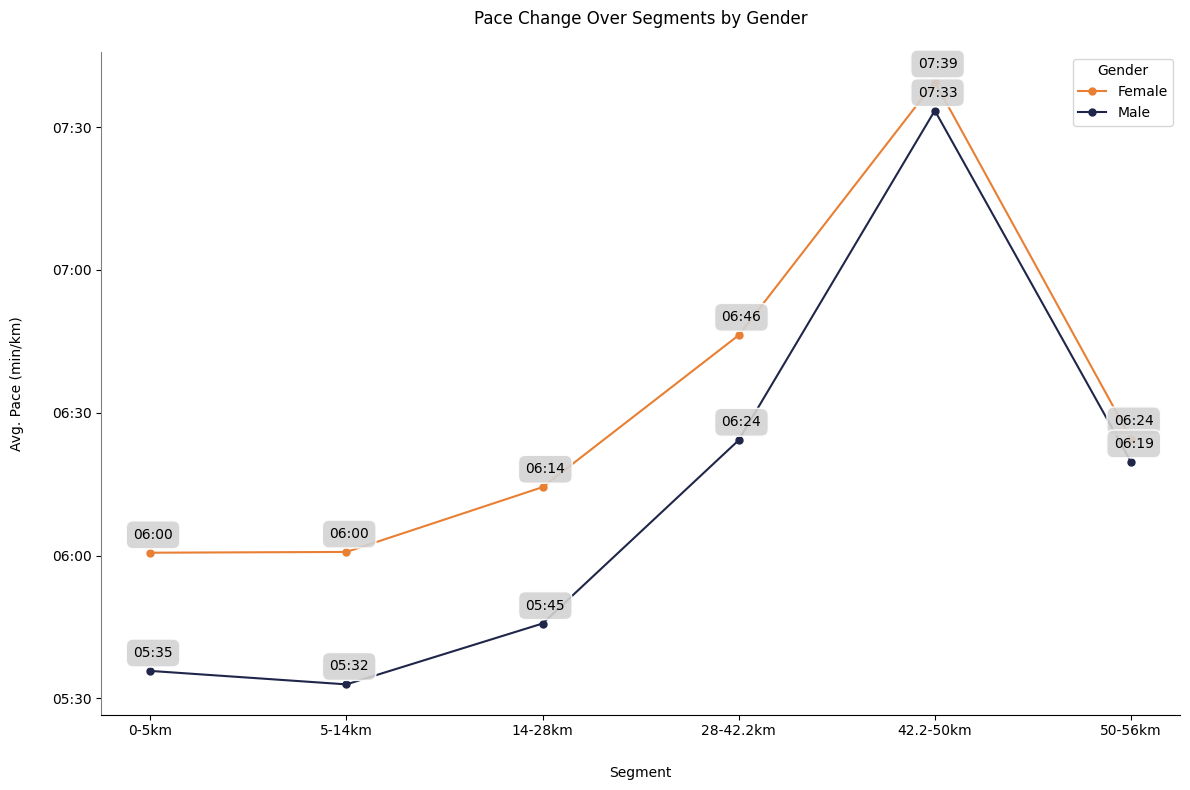

In [140]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot line graph as a time series with reduced marker size
lines = pace_con_cat_pivot[['Pace_Start_5km', 'Pace_5km_14km', 'Pace_14km_28km',
                    'Pace_28km_42.2km', 'Pace_42.2km_50km', 'Pace_50km_Finish']].T.plot(
    kind='line', marker='o', markersize=5, ax=ax, 
    color={'Male': plot_colors['2O-Bl'], 'Female': plot_colors['2O-Or']}  # Assign colors to each category
)

# Set title and axis labels with padding
ax.set_title('Pace Change Over Segments by Gender', pad=20)
ax.set_xlabel('Segment', labelpad=20)
ax.set_ylabel('Avg. Pace (min/km)', labelpad=20)

# Rename x-labels
segments = ['0-5km', '5-14km', '14-28km', '28-42.2km', '42.2-50km', '50-56km']  # New x-labels
ax.set_xticks(range(len(segments)))
ax.set_xticklabels(segments)

# Update y-axis labels to display pace as "7:30", "6:00", etc.
ax.set_yticklabels(['{:02d}:{:02d}'.format(int(pace), int((pace % 1) * 60)) for pace in ax.get_yticks()])

# Remove top and right spines, gray other spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('black')  # Set x-axis spine color to black

# Add grid lines only for the x-axis
# ax.grid(axis='y', color='lightgray')  # Only horizontal grid lines

# Add legend with title
ax.legend(title='Gender')

# Add annotations for pace at each marker
for line in lines.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate('{:02d}:{:02d}'.format(int(y), int((y % 1) * 60)), (x, y), textcoords="offset points", xytext=(2,10), ha='center', bbox=dict(boxstyle='round,pad=0.5', fc='lightgrey', alpha=0.9, edgecolor='white'))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
